<a href="https://colab.research.google.com/github/priya-1703/HousingPricePrediction_bb-assignment01/blob/main/HOUSING_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Import Libraries**


Before training a regression model using PyTorch, we need to import the necessary libraries

In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


**Step 2: Load the Dataset**

We will use pandas to load the dataset. for this example, we will use the California


In [ ]:
# Load the California Housing dataset from sklearn
from sklearn.datasets import fetch_california_housing

# Fetch dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)

# Add the target variable (house prices)
df["Price"] = housing.target

# Display five rows
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**Step 3: Preprocess the Data**

Normalizing features using StandardScaler(same scale)and
Splitting the dataset into training and testing sets using train_test_split.


In [ ]:
# Split features and target variable
X = df.drop(columns=["Price"])  # Features
y = df["Price"]  # Target variable

# Normalize features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)


**Step 4:Convert Data to PyTorch Tensors**

PyTorch models require data in tensor format, so we will convert our NumPy arrays into PyTorch tensors using torch.tensor().

In [ ]:
# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

print("X_train shape:", X_train_tensor.shape)
print("y_train shape:", y_train_tensor.shape)
print("X_test shape:", X_test_tensor.shape)
print("y_test shape:", y_test_tensor.shape)


X_train shape: torch.Size([16512, 8])
y_train shape: torch.Size([16512, 1])
X_test shape: torch.Size([4128, 8])
y_test shape: torch.Size([4128, 1])


**Step 5:Build the Regression Model**

Fully connected (nn.Linear) layers to process input features.
ReLU activation (nn.ReLU()) for non-linearity.
Final output layer with one neuron

In [ ]:
# Define the neural network model
class HousePriceModel(nn.Module):
    def __init__(self, input_size):
        super(HousePriceModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)


input_size = X_train_tensor.shape[1]
model = HousePriceModel(input_size)

print(model)


HousePriceModel(
  (model): Sequential(
    (0): Linear(in_features=8, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)


**Step 6: Define Loss Function and Optimizer**

use Mean Squared Error (MSE) Loss as the loss function

In [ ]:
# loss function (Mean Squared Error for regression)
loss_function = nn.MSELoss()

# optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Learning rate = 0.01


**Step 7: Training**
we train the model using multiple epochs

In [ ]:
# Training parameters
epochs = 100
batch_size = 32

from torch.utils.data import DataLoader, TensorDataset

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

for epoch in range(epochs):
    for batch_X, batch_y in train_loader:
        predictions = model(batch_X)

        loss = loss_function(predictions, batch_y)

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

print("Training complete!")


Epoch 10/100, Loss: 0.1857
Epoch 20/100, Loss: 0.4126
Epoch 30/100, Loss: 0.1835
Epoch 40/100, Loss: 0.1563
Epoch 50/100, Loss: 0.3060
Epoch 60/100, Loss: 0.2903
Epoch 70/100, Loss: 0.2928
Epoch 80/100, Loss: 0.2655
Epoch 90/100, Loss: 0.3313
Epoch 100/100, Loss: 0.2701
Training complete!


**Step 8: Evaluate the Model**

Computing Mean Squared Error (MSE) on the test set.

Comparing predicted vsactual house prices.

Visualizing results with a scatter plot.

Mean Squared Error on Test Set: 0.2949


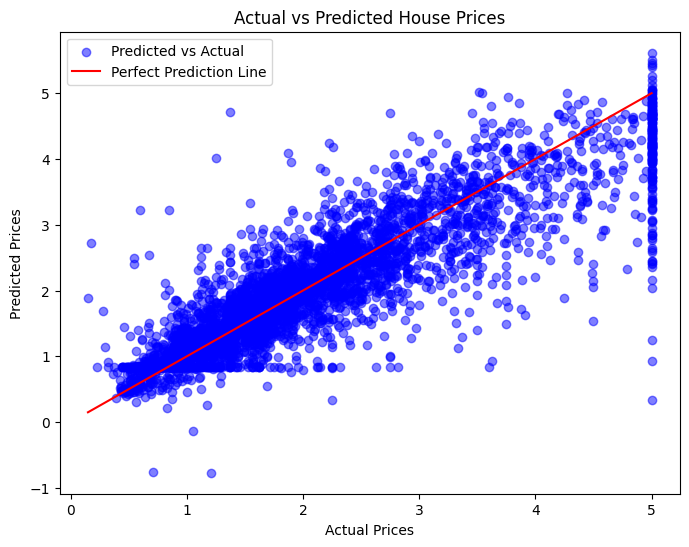

In [ ]:
#Compute Mean Squared Error
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)

mse = loss_function(y_pred, y_test_tensor).item()
print(f"Mean Squared Error on Test Set: {mse:.4f}")

#Compare Predicted vs Actual Prices Graphically

import matplotlib.pyplot as plt
y_pred_np = y_pred.numpy().flatten()
y_test_np = y_test_tensor.numpy().flatten()

plt.figure(figsize=(8,6))
plt.scatter(y_test_np, y_pred_np, alpha=0.5, color='blue', label="Predicted vs Actual")
plt.plot([min(y_test_np), max(y_test_np)], [min(y_test_np), max(y_test_np)], 'r', label="Perfect Prediction Line")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()

**bonus challange**

1. trying with different no.of layers


In [ ]:
# Define a deeper neural network with more neurons
class ImprovedHousePriceModel(nn.Module):
    def __init__(self, input_size):
        super(ImprovedHousePriceModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.model(x)

model = ImprovedHousePriceModel(X_train_tensor.shape[1])

print(model)

# Define new optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.005)
loss_function = nn.MSELoss()


epochs = 100
for epoch in range(epochs):
    for batch_X, batch_y in train_loader:
        predictions = model(batch_X)
        loss = loss_function(predictions, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")


model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)

mse = loss_function(y_pred, y_test_tensor).item()
print(f"Mean Squared Error (MSE) with deeper model: {mse:.4f}")




ImprovedHousePriceModel(
  (model): Sequential(
    (0): Linear(in_features=8, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=16, bias=True)
    (7): ReLU()
    (8): Linear(in_features=16, out_features=1, bias=True)
  )
)
Epoch 10/100, Loss: 0.2292
Epoch 20/100, Loss: 0.2250
Epoch 30/100, Loss: 0.2985
Epoch 40/100, Loss: 0.0829
Epoch 50/100, Loss: 0.2258
Epoch 60/100, Loss: 0.2460
Epoch 70/100, Loss: 0.3508
Epoch 80/100, Loss: 0.2405
Epoch 90/100, Loss: 0.3706
Epoch 100/100, Loss: 0.1416
Mean Squared Error (MSE) with deeper model: 0.2597


 2. Experiment with different activation functions

In [ ]:
#sigmoid
class HousePriceModel_Sigmoid(nn.Module):
    def __init__(self, input_size):
        super(HousePriceModel_Sigmoid, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.Sigmoid(),
            nn.Linear(128, 64),
            nn.Sigmoid(),
            nn.Linear(64, 32),
            nn.Sigmoid(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

model_sigmoid = HousePriceModel_Sigmoid(X_train_tensor.shape[1])

#Train and Compare Models

def train_and_evaluate(model, epochs=100, lr=0.005):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_function = nn.MSELoss()

    for epoch in range(epochs):
        for batch_X, batch_y in train_loader:
            predictions = model(batch_X)
            loss = loss_function(predictions, batch_y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

    model.eval()
    with torch.no_grad():
        y_pred = model(X_test_tensor)

    mse = loss_function(y_pred, y_test_tensor).item()
    return mse

# Train and evaluate different models
mse_sigmoid = train_and_evaluate(model_sigmoid)

print(f"MSE (Sigmoid): {mse_sigmoid:.4f}")



Epoch 10/100, Loss: 0.3189
Epoch 20/100, Loss: 0.2093
Epoch 30/100, Loss: 0.1355
Epoch 40/100, Loss: 0.2185
Epoch 50/100, Loss: 0.0294
Epoch 60/100, Loss: 0.2322
Epoch 70/100, Loss: 0.2055
Epoch 80/100, Loss: 0.2440
Epoch 90/100, Loss: 0.5949
Epoch 100/100, Loss: 0.2772
MSE (Sigmoid): 0.2632


comparing signoid and ReLU

Epoch 10/100, Loss: 0.1760
Epoch 20/100, Loss: 0.1049
Epoch 30/100, Loss: 0.1440
Epoch 40/100, Loss: 0.1354
Epoch 50/100, Loss: 0.2856
Epoch 60/100, Loss: 0.3125
Epoch 70/100, Loss: 0.2565
Epoch 80/100, Loss: 0.3325
Epoch 90/100, Loss: 0.0626
Epoch 100/100, Loss: 0.1129

Model Performance Comparison:
MSE (Sigmoid): 0.2632
MSE (ReLU): 0.2836


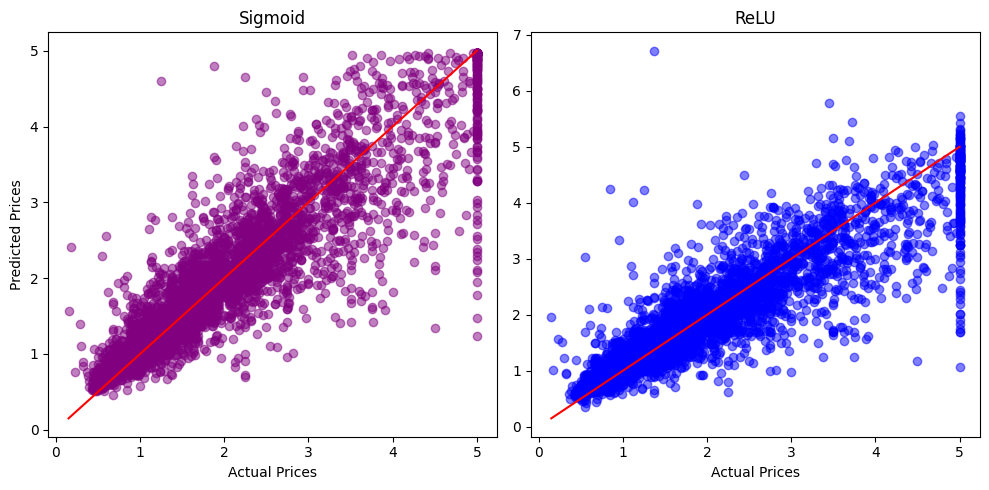

In [ ]:
# Train the ReLU model
mse_relu = train_and_evaluate(model)

print("\nModel Performance Comparison:")
print(f"MSE (Sigmoid): {mse_sigmoid:.4f}")
print(f"MSE (ReLU): {mse_relu:.4f}")

# Ensure models are in evaluation mode
model_sigmoid.eval()
model.eval()

with torch.no_grad():
    y_pred_sigmoid = model_sigmoid(X_test_tensor).numpy().flatten()
    y_pred_relu = model(X_test_tensor).numpy().flatten()


y_test_np = y_test_tensor.numpy().flatten()



import matplotlib.pyplot as plt

# Get predictions for visualization
model.eval()
with torch.no_grad():
    y_pred_relu = model(X_test_tensor).numpy().flatten()

y_test_np = y_test_tensor.numpy().flatten()

plt.figure(figsize=(10, 5))

# Sigmoid Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test_np, y_pred_sigmoid, alpha=0.5, color='purple')
plt.plot([min(y_test_np), max(y_test_np)], [min(y_test_np), max(y_test_np)], 'r')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Sigmoid")

# ReLU Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test_np, y_pred_relu, alpha=0.5, color='blue')
plt.plot([min(y_test_np), max(y_test_np)], [min(y_test_np), max(y_test_np)], 'r')
plt.xlabel("Actual Prices")
plt.title("ReLU")

plt.tight_layout()
plt.show()


conclusion: Relu is better than sigmoid for regression problems because it allows for unbounded positive outputs, while Sigmoid squashes outputs between 0 and 1